In [1]:
import torch
from torch import nn, Tensor
import numpy as np
import random
import copy
import pickle
import os
import pandas as pd
import time
import matplotlib.pyplot as plt

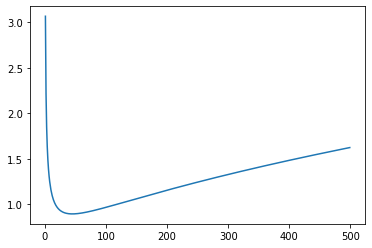

In [2]:
y = torch.tensor(list(3/n**(0.5) +1/15*n**(0.5) for n in range(1,500)))
x = torch.tensor(list(n for n in range(1,500)))
plt.plot(x,y)

<function matplotlib.pyplot.show(*args, **kw)>

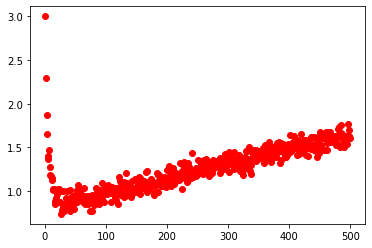

In [20]:
y_data =y + 0.07*torch.randn(y.size(0))
plt.plot(x,y_data, "ro")
plt.show

In [18]:
class fit_net():
    def __init__(self):
        self.coefficients = torch.randn(3)/10
        self.exponents = torch.tensor([1/2,-1/2]) +1/5*torch.randn(2)
        self.exponents.requires_grad=True
        self.coefficients.requires_grad=True
        self.parameters = [self.coefficients, self.exponents]

    def __call__(self, input):
        output = torch.cat([torch.ones_like(input).unsqueeze(1), torch.exp(torch.log(input.unsqueeze(1))*self.exponents)], dim=1)
        return torch.matmul(output, self.coefficients)


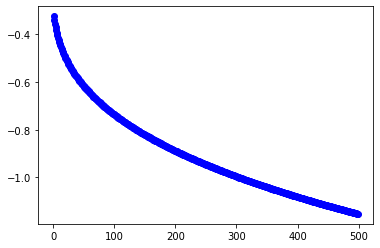

In [19]:
net = fit_net()
y_init = net(x)
plt.plot(x,y_init.detach(), "bo")

In [10]:
epsilon = 0.001
criterion = nn.MSELoss()
lr= 0.005
for epoch in range(10000):
    out = net(x)
    loss = criterion(out, y_data) + epsilon* torch.sum(net.exponents**2)
    
    loss.backward()
    with torch.no_grad():
        net.coefficients -= net.coefficients.grad *lr
        net.exponents -= net.exponents.grad *lr
        net.coefficients.grad.zero_()
        net.exponents.grad.zero_()
    
    if epoch%2000==0:
        print(f"Loss: {loss:.2E} | A: {net.coefficients[0]:.2E} B: {net.coefficients[1]:.2E} C: {net.coefficients[2]:.2E} alpha1: {net.exponents[0]:.2E}  alpha2: {net.exponents[1]:.2E}")

        

Loss: 2.03E-02 | A: 3.94E-01 B: 7.98E-02 C: 1.17E+00 alpha1: 4.23E-01  alpha2: -5.12E-01
Loss: 1.44E-02 | A: 4.11E-01 B: 5.96E-02 C: 1.28E+00 alpha1: 4.66E-01  alpha2: -5.06E-01
Loss: 1.85E-02 | A: 4.02E-01 B: 6.19E-02 C: 1.37E+00 alpha1: 4.78E-01  alpha2: -5.19E-01
Loss: 2.54E-02 | A: 3.91E-01 B: 6.68E-02 C: 1.46E+00 alpha1: 4.72E-01  alpha2: -5.29E-01
Loss: 1.31E-02 | A: 3.78E-01 B: 6.20E-02 C: 1.54E+00 alpha1: 4.73E-01  alpha2: -5.37E-01


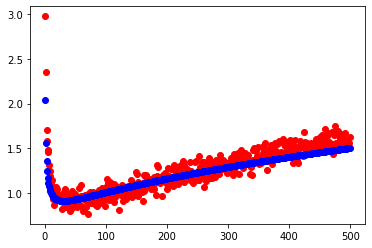

In [11]:
y_f = net(x)
plt.plot(x, y_data, "ro", x,y_f.detach(), "bo")